#Song Popularity

Kaggle dataset link: https://www.kaggle.com/yasserh/song-popularity-dataset

Here's the description of main features
([ definition source](https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de)):

* Acousticness: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
* Energy: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
* Danceability: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
* Valence: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.
* Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
* Instrumentalness: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.



In [1]:
#import libraries

import pandas as pd
import numpy as np
import copy

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

###Have a Look at the Dataset

In [2]:
#import data

df = pd.read_csv("/content/drive/MyDrive/data/songs/song_data.csv")

In [3]:
df.head()

song_name  song_popularity  ...  time_signature  audio_valence
0  Boulevard of Broken Dreams               73  ...               4          0.474
1                  In The End               66  ...               4          0.370
2           Seven Nation Army               76  ...               4          0.324
3                  By The Way               74  ...               4          0.198
4           How You Remind Me               56  ...               4          0.574

[5 rows x 15 columns]

In [4]:
#create a "minutes" column for more understanding
df["song_duration_min"] = round(((df["song_duration_ms"])/(1000*60))%60, 2)

In [5]:
df.head()

song_name  ...  song_duration_min
0  Boulevard of Broken Dreams  ...               4.37
1                  In The End  ...               3.62
2           Seven Nation Army  ...               3.86
3                  By The Way  ...               3.62
4           How You Remind Me  ...               3.73

[5 rows x 16 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   song_name          18835 non-null  object 
 1   song_popularity    18835 non-null  int64  
 2   song_duration_ms   18835 non-null  int64  
 3   acousticness       18835 non-null  float64
 4   danceability       18835 non-null  float64
 5   energy             18835 non-null  float64
 6   instrumentalness   18835 non-null  float64
 7   key                18835 non-null  int64  
 8   liveness           18835 non-null  float64
 9   loudness           18835 non-null  float64
 10  audio_mode         18835 non-null  int64  
 11  speechiness        18835 non-null  float64
 12  tempo              18835 non-null  float64
 13  time_signature     18835 non-null  int64  
 14  audio_valence      18835 non-null  float64
 15  song_duration_min  18835 non-null  float64
dtypes: float64(10), int64(

In [7]:
df.isnull().sum()

song_name            0
song_popularity      0
song_duration_ms     0
acousticness         0
danceability         0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
audio_mode           0
speechiness          0
tempo                0
time_signature       0
audio_valence        0
song_duration_min    0
dtype: int64

In [8]:
df.describe()

song_popularity  song_duration_ms  ...  audio_valence  song_duration_min
count     18835.000000      1.883500e+04  ...   18835.000000       18835.000000
mean         52.991877      2.182116e+05  ...       0.527967           3.636869
std          21.905654      5.988754e+04  ...       0.244632           0.998144
min           0.000000      1.200000e+04  ...       0.000000           0.200000
25%          40.000000      1.843395e+05  ...       0.335000           3.070000
50%          56.000000      2.113060e+05  ...       0.527000           3.520000
75%          69.000000      2.428440e+05  ...       0.725000           4.050000
max         100.000000      1.799346e+06  ...       0.984000          29.990000

[8 rows x 15 columns]

In [9]:
corr = df.corr()
corr

song_popularity  ...  song_duration_min
song_popularity           1.000000  ...          -0.018945
song_duration_ms         -0.018899  ...           0.999996
acousticness             -0.065181  ...          -0.097818
danceability              0.104290  ...          -0.105014
energy                    0.001365  ...           0.092654
instrumentalness         -0.130907  ...          -0.015190
key                      -0.013160  ...          -0.004615
liveness                 -0.038937  ...           0.016103
loudness                  0.099442  ...           0.016405
audio_mode               -0.004969  ...          -0.026362
speechiness               0.021479  ...          -0.083439
tempo                    -0.022672  ...           0.012748
time_signature            0.034983  ...           0.000223
audio_valence            -0.052895  ...          -0.063417
song_duration_min        -0.018945  ...           1.000000

[15 rows x 15 columns]

###Visualization

In [10]:
for column in df:
  fig = px.histogram(df, x=column, title=f"{column} data distribution")
  fig.show()


#scroll to see all

What is interesting, the dataset has a lot of songs with similar names. Let's have a look:

In [11]:
df[df["song_name"] == "Lie"]

song_name  song_popularity  ...  audio_valence  song_duration_min
4342        Lie               82  ...          0.182               3.49
4669        Lie               65  ...          0.224               3.59
5625        Lie               82  ...          0.182               3.49
7863        Lie               65  ...          0.224               3.59
9033        Lie               82  ...          0.182               3.49
10626       Lie               65  ...          0.224               3.59
15232       Lie               65  ...          0.224               3.59
16599       Lie               52  ...          0.157               4.12

[8 rows x 16 columns]

As we see, every row represents different songs (and/or remixes) since their features are different. 

Song names that have a lot of value counts usually contain either a short word or a popular phrase as the graph shows

###Correlations

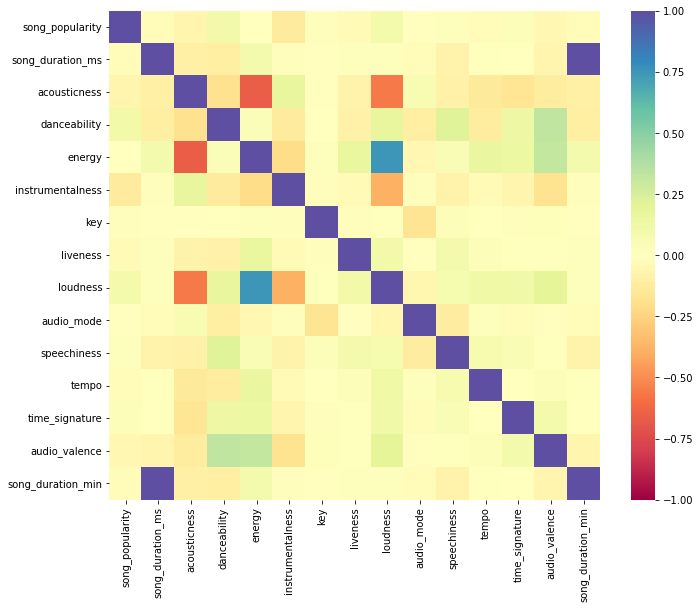

In [12]:
plt.figure(figsize=(11, 9))
sns.heatmap(df.corr(), 
            vmin=-1,
            vmax=1,
            cmap="Spectral")

plt.show()


These aren't a lot of strong correlations. Yet, the heatmap inspires to explore the few of them and some other interesting moments

In [13]:
fig = px.scatter(df, x="song_duration_min", y="song_popularity", color="song_popularity", hover_name="song_name",
                 title="Correlation Between Song Duration and Popularity")

fig.show()


The correlation between song duration and popularity is not big, but popular songs are hardly ever long

In [14]:
fig = px.scatter(df, x="loudness", y="song_popularity", color="song_popularity", hover_name="song_name",
                 title="Correlation Between Loudness and Popularity")

fig.show()


Popular songs are mostly loud

In [15]:
fig = px.scatter(df, x="acousticness", y="loudness", color="song_popularity", hover_name="song_name",
                 title="Correlation Between Acousticness and Loudness")

fig.show()


Loudness goes a bit down as acousticness goes up

In [16]:
fig = px.scatter(df, x="energy", y="loudness", color="song_popularity", hover_name="song_name",
                 title="Correlation Between Energy and Loudness")

fig.show()


Energy and loudness go up together (and song popularity tends to grow with them)
